# Decouverte de l'environnement

In [2]:
from env_traffic import TrafficEnvironment
import matplotlib.pyplot as plt

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [4 7 5 7] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 4 5 8]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 2:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 1 7 9]
  🎯 Reward (Cars Passed): 5
----------------------------------------
Step 3:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [ 0  1  8 10]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 4:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [ 0  2  9 12]
  🎯 Reward (Cars Passed): 1
----------------------------------------
Step 5:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [ 1  1  9 13]
  🎯 Reward (Cars Passed): 1
------------

In [3]:
env = TrafficEnvironment()
state = env.reset()

for _ in range(10):
    action = 0 # Garder le feu qu'il est
    next_state, reward = env.step(action)
    print(f"Etat : {next_state}, Recompense : {reward}")

Etat : [7 0 9 4], Recompense : 4
Etat : [ 4  1 10  5], Recompense : 4
Etat : [ 2  1 11  6], Recompense : 5
Etat : [ 0  2 11  7], Recompense : 3
Etat : [ 1  2 13  7], Recompense : 2
Etat : [ 2  2 13  9], Recompense : 3
Etat : [ 2  1 13 10], Recompense : 4
Etat : [ 0  2 13 12], Recompense : 2
Etat : [ 0  1 13 14], Recompense : 1
Etat : [ 2  2 14 16], Recompense : 1


# Implementation de Q-learning 

In [4]:
import numpy as np
q_table = np.zeros((10, 10, 10, 10, 2))

print(q_table)

[[[[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

Épisode 0, epsilon: 0.995, Reward: 160
Épisode 100, epsilon: 0.603, Reward: 149
Épisode 200, epsilon: 0.365, Reward: 160
Épisode 300, epsilon: 0.221, Reward: 153
Épisode 400, epsilon: 0.134, Reward: 160
Épisode 500, epsilon: 0.081, Reward: 169
Épisode 600, epsilon: 0.049, Reward: 167
Épisode 700, epsilon: 0.030, Reward: 162
Épisode 800, epsilon: 0.018, Reward: 155
Épisode 900, epsilon: 0.011, Reward: 168
🚦 Entraînement terminé !


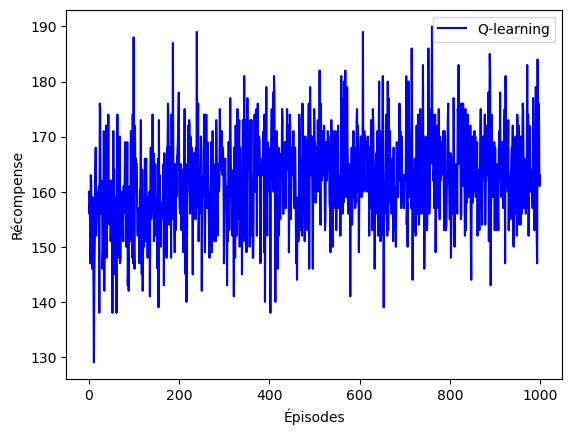

Q-table après entraînement:
[[[[[ 9.56537336  0.67359592]
    [11.28312615  0.99465347]
    [ 1.86330092 13.14688827]
    ...
    [ 0.          0.        ]
    [ 0.          0.        ]
    [ 0.          0.        ]]

   [[11.30605412  1.57963222]
    [ 0.51432838 13.59196264]
    [ 2.42157257 14.99009116]
    ...
    [ 0.39128116  0.        ]
    [ 0.12978766  0.        ]
    [ 0.36078243  0.        ]]

   [[ 0.74466214 12.59832152]
    [ 2.73759843 14.40963977]
    [ 3.7952881  15.84739176]
    ...
    [ 0.          4.35490432]
    [ 0.18614107  0.        ]
    [ 0.          3.70815423]]

   ...

   [[ 0.          0.        ]
    [ 0.42854745  0.        ]
    [ 0.6225247   0.        ]
    ...
    [ 0.          3.87616843]
    [ 0.          4.14290443]
    [ 1.7877741   0.        ]]

   [[ 0.          0.        ]
    [ 0.42311389  0.        ]
    [ 0.69859569  0.        ]
    ...
    [ 0.19130329  2.01089472]
    [ 0.039078    3.27322286]
    [ 2.69768469  0.        ]]

   [[ 0.075978

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):  
    q_learning_rewards = []  # ✅ Store total reward per episode

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))
        total_reward = 0  # ✅ Track total reward for this episode

        for step in range(50):  # Max steps per episode
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])  # Explore
            else:
                action = np.argmax(q_table[state])  # Exploit

            next_state, reward = env.step(action)
            next_state = tuple(np.clip(next_state, 0, 9))
            total_reward += reward  # ✅ Accumulate reward

            # Update Q-table using Bellman equation
            best_next_action = np.argmax(q_table[next_state])  
            q_table[state + (action,)] += alpha * (reward + gamma * q_table[next_state + (best_next_action,)] - q_table[state + (action,)])

            state = next_state  

        q_learning_rewards.append(total_reward)  # ✅ Store episode reward
        epsilon = max(0.01, epsilon * decay)  # Decay epsilon

        if episode % 100 == 0:
            print(f"Épisode {episode}, epsilon: {epsilon:.3f}, Reward: {total_reward}")

    print("🚦 Entraînement terminé !")
    return q_table, q_learning_rewards  # ✅ Return both Q-table and rewards

# ✅ Train the model
env = TrafficEnvironment()
q_table, q_learning_rewards = train_q_learning(env, episodes=1000)

# ✅ Plot the learning curve
plt.plot(q_learning_rewards, label="Q-learning", color='b')
plt.xlabel("Épisodes")
plt.ylabel("Récompense")
plt.legend()
plt.show()

print("Q-table après entraînement:")
print(q_table)

# Implementation de SARSA

In [6]:
import numpy as np
sarsa_table = np.zeros((10, 10, 10, 10, 2))

print(sarsa_table)

[[[[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

In [7]:
def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    sarsa_rewards = []  # Stocker la récompense totale par épisode

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))
        total_reward = 0  # Suivre la récompense totale pour cet épisode

        # Choisir une action initiale
        if np.random.rand() < epsilon:
            action = np.random.choice([0, 1])  # Exploration
        else:
            action = np.argmax(sarsa_table[state])  # Exploitation

        for step in range(50):  # Nombre maximal d'étapes par épisode
            next_state, reward = env.step(action)
            next_state = tuple(np.clip(next_state, 0, 9))
            total_reward += reward  # Accumuler la récompense

            # Choisir la prochaine action
            if np.random.rand() < epsilon:
                next_action = np.random.choice([0, 1])  # Exploration
            else:
                next_action = np.argmax(sarsa_table[next_state])  # Exploitation

            # Mettre à jour la Q-table avec SARSA
            sarsa_table[state + (action,)] += alpha * (reward + gamma * sarsa_table[next_state + (next_action,)] - sarsa_table[state + (action,)])

            state = next_state
            action = next_action

        sarsa_rewards.append(total_reward)  # Stocker la récompense de l'épisode
        epsilon = max(0.01, epsilon * decay)  # Décroissance de epsilon

        if episode % 100 == 0:
            print(f"Épisode {episode}, epsilon: {epsilon:.3f}, Reward: {total_reward}")

    print("🚦 Entraînement SARSA terminé !")
    return sarsa_table, sarsa_rewards  # Retourner la Q-table et les récompenses

In [8]:
# Entraîner le modèle SARSA
sarsa_table, sarsa_rewards = train_sarsa(env, episodes=1000)

Épisode 0, epsilon: 0.995, Reward: 154
Épisode 100, epsilon: 0.603, Reward: 160
Épisode 200, epsilon: 0.365, Reward: 165
Épisode 300, epsilon: 0.221, Reward: 159
Épisode 400, epsilon: 0.134, Reward: 154
Épisode 500, epsilon: 0.081, Reward: 150
Épisode 600, epsilon: 0.049, Reward: 176
Épisode 700, epsilon: 0.030, Reward: 154
Épisode 800, epsilon: 0.018, Reward: 157
Épisode 900, epsilon: 0.011, Reward: 169
🚦 Entraînement SARSA terminé !


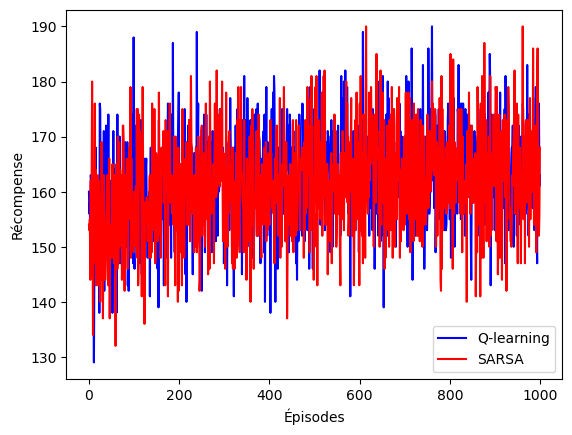

Q-table SARSA après entraînement:
[[[[[ 7.36360286  0.14257215]
    [10.35678155  1.39142009]
    [ 1.58457689 12.27321602]
    ...
    [ 0.          0.        ]
    [ 0.71308136  0.        ]
    [ 0.07164     0.        ]]

   [[ 0.          9.41195527]
    [ 0.036      13.17457155]
    [ 2.75187796 14.39051646]
    ...
    [ 0.07814009  0.        ]
    [ 0.          0.        ]
    [ 0.          0.878     ]]

   [[11.39918565  1.05953111]
    [ 0.51977774 14.64188741]
    [13.32425565  4.30179071]
    ...
    [ 0.          3.86587421]
    [ 0.76071038  0.        ]
    [ 0.79620306  0.        ]]

   ...

   [[ 0.09156906  0.        ]
    [ 0.          0.        ]
    [ 0.          4.3988027 ]
    ...
    [ 0.027       3.21941741]
    [ 0.          0.        ]
    [ 2.11344201  0.9276726 ]]

   [[ 0.          0.78538158]
    [ 0.51085047  0.        ]
    [ 0.          1.07278058]
    ...
    [ 0.26320429  0.        ]
    [ 0.58696285  0.        ]
    [ 0.68735928  6.72855402]]

   [[ 0.

In [9]:
# Tracer la courbe d'apprentissage
plt.plot(q_learning_rewards, label="Q-learning", color='b')
plt.plot(sarsa_rewards, label="SARSA", color='r')
plt.xlabel("Épisodes")
plt.ylabel("Récompense")
plt.legend()
plt.show()

print("Q-table SARSA après entraînement:")
print(sarsa_table)

In [11]:
# Calculer la récompense moyenne pour Q-Learning et SARSA
q_learning_avg_rewards = [sum(q_learning_rewards[:i+1]) / (i+1) for i in range(len(q_learning_rewards))]
sarsa_avg_rewards = [sum(sarsa_rewards[:i+1]) / (i+1) for i in range(len(sarsa_rewards))]

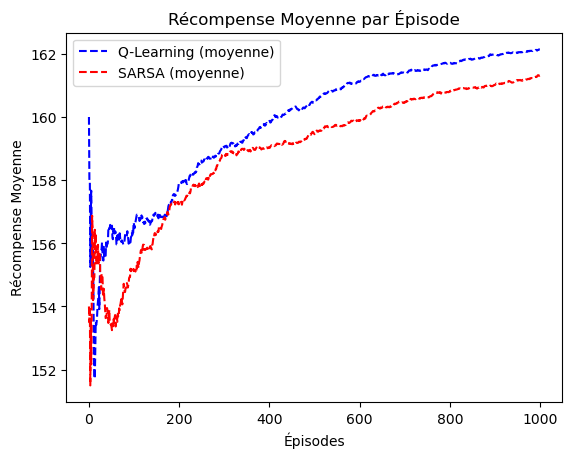

In [12]:
# Tracer la récompense moyenne
plt.plot(q_learning_avg_rewards, label="Q-Learning (moyenne)", color='b', linestyle='--')
plt.plot(sarsa_avg_rewards, label="SARSA (moyenne)", color='r', linestyle='--')
plt.xlabel("Épisodes")
plt.ylabel("Récompense Moyenne")
plt.legend()
plt.title("Récompense Moyenne par Épisode")
plt.show()

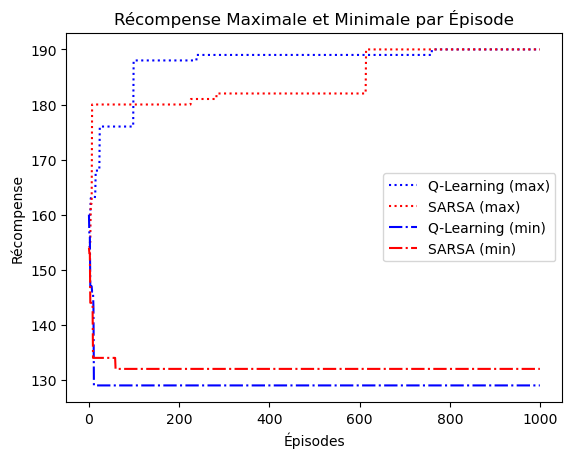

In [13]:
# Comparaison des récompenses maximales et minimales
q_learning_max_rewards = [max(q_learning_rewards[:i+1]) for i in range(len(q_learning_rewards))]
sarsa_max_rewards = [max(sarsa_rewards[:i+1]) for i in range(len(sarsa_rewards))]

q_learning_min_rewards = [min(q_learning_rewards[:i+1]) for i in range(len(q_learning_rewards))]
sarsa_min_rewards = [min(sarsa_rewards[:i+1]) for i in range(len(sarsa_rewards))]

plt.plot(q_learning_max_rewards, label="Q-Learning (max)", color='b', linestyle=':')
plt.plot(sarsa_max_rewards, label="SARSA (max)", color='r', linestyle=':')
plt.plot(q_learning_min_rewards, label="Q-Learning (min)", color='b', linestyle='-.')
plt.plot(sarsa_min_rewards, label="SARSA (min)", color='r', linestyle='-.')
plt.xlabel("Épisodes")
plt.ylabel("Récompense")
plt.legend()
plt.title("Récompense Maximale et Minimale par Épisode")
plt.show()

In [14]:
# Affichage des meilleures politiques apprises
def get_best_policy(q_table):
    policy = np.zeros((10, 10, 10, 10), dtype=int)
    for i in range(10):
        for j in range(10):
            for k in range(10):
                for l in range(10):
                    policy[i, j, k, l] = np.argmax(q_table[i, j, k, l])
    return policy

best_policy_q_learning = get_best_policy(q_table)
best_policy_sarsa = get_best_policy(sarsa_table)

print("Meilleure politique apprise par Q-Learning :")
print(best_policy_q_learning)

print("Meilleure politique apprise par SARSA :")
print(best_policy_sarsa)

Meilleure politique apprise par Q-Learning :
[[[[0 0 1 ... 0 0 0]
   [0 1 1 ... 0 0 0]
   [1 1 1 ... 1 0 1]
   ...
   [0 0 0 ... 1 1 0]
   [0 0 0 ... 1 1 0]
   [0 0 1 ... 0 0 1]]

  [[1 1 1 ... 0 0 0]
   [0 1 0 ... 0 0 1]
   [1 1 1 ... 0 1 0]
   ...
   [0 0 1 ... 1 1 1]
   [0 0 0 ... 0 0 1]
   [0 0 1 ... 1 1 1]]

  [[1 1 0 ... 0 0 0]
   [1 1 0 ... 0 0 0]
   [1 1 0 ... 1 0 0]
   ...
   [0 0 0 ... 0 0 1]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 1 1 0]]

  ...

  [[0 0 1 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 1]]

  [[0 0 0 ... 0 0 0]
   [0 0 1 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[1 1 0 ... 0 0 1]
   [0 1 0 ... 0 0 0]
   [0 1 1 ... 0 0 1]
   ...
   [1 1 1 ... 0 0 1]
   [0 1 0 ... 0 0 1]
   [0 1 1 ... 0 1 1]]

 

In [15]:
# Comparaison finale des performances
final_q_learning_reward = np.mean(q_learning_rewards[-100:])  # Moyenne des 100 derniers épisodes
final_sarsa_reward = np.mean(sarsa_rewards[-100:])  # Moyenne des 100 derniers épisodes


In [16]:
print(f"Récompense finale moyenne (Q-Learning) : {final_q_learning_reward}")
print(f"Récompense finale moyenne (SARSA) : {final_sarsa_reward}")

if final_q_learning_reward > final_sarsa_reward:
    print("Q-Learning a performé mieux que SARSA.")
elif final_q_learning_reward < final_sarsa_reward:
    print("SARSA a performé mieux que Q-Learning.")
else:
    print("Q-Learning et SARSA ont performé de manière similaire.")

Récompense finale moyenne (Q-Learning) : 163.62
Récompense finale moyenne (SARSA) : 164.02
SARSA a performé mieux que Q-Learning.
